## Imports 🙅🏻‍♂️🙅🏻‍♀️

In [1]:
import matplotlib
import cv2
import math
from matplotlib import pyplot as plt

import numpy as np
%matplotlib inline
import imageio
import os

In [3]:
img1 = cv2.imread("image1.jpeg")  
img2 = cv2.imread('image2.jpeg') 

In [4]:
print(img1.shape)
print(img2.shape)

(1600, 900, 3)
(1600, 900, 3)


In [5]:
# Grayscale Conversion 
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Gaussian Blur for Noise Reduction
blur_img1 = cv2.GaussianBlur(gray_img1, (3, 3), 0)
blur_img2 = cv2.GaussianBlur(gray_img2, (3, 3), 0)

# plt.imshow(blur_img1, cmap='gray')
# plt.show()
# plt.imshow(blur_img2, cmap='gray')
# plt.show()

cv2.imwrite('preprocessed_img1.jpg', blur_img1) 
cv2.imwrite('preprocessed_img2.jpg', blur_img2) 

True

In [6]:
print(blur_img1.shape)
print(blur_img2.shape)

(1600, 900)
(1600, 900)


In [7]:

img1 = cv2.imread("preprocessed_img1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("preprocessed_img2.jpg", cv2.IMREAD_GRAYSCALE)


In [8]:
print(img1.shape)

(1600, 900)


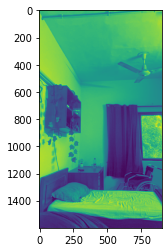

In [9]:
plt.imshow(img1)
plt.show()

In [10]:
first_image_points = point_reader(img1)

In [11]:
print(first_image_points)

[[ 436 1200]
 [ 490  691]
 [ 602  380]
 [ 720  698]
 [ 654 1244]
 [ 849 1318]]


In [12]:
second_image_points = point_reader(img2)

In [13]:
print(second_image_points)

[[  45 1193]
 [ 135  667]
 [ 244  354]
 [ 367  684]
 [ 278 1222]
 [ 461 1277]]


In [14]:
first_image_points = [(img[0],img[1]) for img in first_image_points]
second_image_points = [(img[0],img[1]) for img in second_image_points]

In [15]:
second_image_points

[(45, 1193), (135, 667), (244, 354), (367, 684), (278, 1222), (461, 1277)]

### Finding Homography (25 Marks)
calculate the homography matrix H.
$$
\begin{bmatrix}
x'  \\
y'  \\
h 
\end{bmatrix}
=
\begin{bmatrix}
h_1 & h_2 & h_3 \\
h_4 & h_5 & h_6 \\
h_7 & h_8 & h_9
\end{bmatrix}
\times 
\begin{bmatrix}
x  \\
y  \\
1 
\end{bmatrix}
$$

In [16]:
def construct_homography_matrix(image1_points, image2_points):
    if len(image1_points) != len(image2_points):
        print("not equal number of points boss")
        return
    A = []
    for (x, y), (x_prime, y_prime) in zip(image1_points, image2_points):
        row1 = [x, y, 1, 0, 0, 0, -x*x_prime, -y*x_prime, -x_prime]
        row2 = [0, 0, 0, x, y, 1, -x*y_prime, -y*y_prime, -y_prime]
        A.append(row1)
        A.append(row2)
    A_matrix = np.array(A)
    return A_matrix

In [17]:
matrix = construct_homography_matrix(second_image_points, first_image_points)

In [18]:
print(matrix) 

[[      45     1193        1        0        0        0   -19620  -520148
      -436]
 [       0        0        0       45     1193        1   -54000 -1431600
     -1200]
 [     135      667        1        0        0        0   -66150  -326830
      -490]
 [       0        0        0      135      667        1   -93285  -460897
      -691]
 [     244      354        1        0        0        0  -146888  -213108
      -602]
 [       0        0        0      244      354        1   -92720  -134520
      -380]
 [     367      684        1        0        0        0  -264240  -492480
      -720]
 [       0        0        0      367      684        1  -256166  -477432
      -698]
 [     278     1222        1        0        0        0  -181812  -799188
      -654]
 [       0        0        0      278     1222        1  -345832 -1520168
     -1244]
 [     461     1277        1        0        0        0  -391389 -1084173
      -849]
 [       0        0        0      461     1277        

### Calculating SVD

In [19]:
# List of useful functions
u, s, vh = np.linalg.svd(matrix) # Replace it with your H matrix
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

Homography matrix
 [[ 2.03499268e-03  2.94865348e-05  9.71966059e-01]
 [-5.22732345e-04  2.37837402e-03  2.35084742e-01]
 [-5.68569933e-07 -7.68865949e-08  2.65946774e-03]]


### STITCH 

In [20]:
# YOUR CODE
height, width = img1.shape

In [21]:
print(height, width)

1600 900


In [22]:
print(matrix.shape)
print(type(matrix))

(12, 9)
<class 'numpy.ndarray'>


In [23]:
print(img2.shape)

(1600, 900)


In [24]:
print(img1.shape)

(1600, 900)


In [25]:
warped_img2 = cv2.warpPerspective(img2, P, (width*2, height))

In [27]:
warped_img2[:height, :width] = img1

In [28]:
cv2.imwrite("StitchedImage.jpeg", warped_img2)


True


## Calculating the camera matrix of my own phone 


### Defining the Axis 

In [29]:
imgs = [cv2.imread(f"./oreo/{img}") for img in os.listdir("oreo")]


In [30]:
print(len(imgs))

6


In [31]:
# axis_definition = point_reader(imgs[0])

In [32]:
axis_definition = [[183, 567],[129 ,225],[608 ,414],[593 ,807]]

In [33]:
print(axis_definition) # first point is origin, second is x axis head, third is y axis head and fourth is z axis head

[[183, 567], [129, 225], [608, 414], [593, 807]]


In [34]:
img = imgs[0]

In [35]:

# X axis(Red line)
cv2.arrowedLine(img, axis_definition[0], axis_definition[1], (0, 0, 255), 5)
# Y-axis (Green line)
cv2.arrowedLine(img, axis_definition[0], axis_definition[2], (0, 255, 0), 5)
# Z-axis (Blue line) 
cv2.arrowedLine(img,axis_definition[0], axis_definition[3], (255, 0, 0), 5)

cv2.imwrite('axis.jpg', img) 

True

### Marking 20 Image Points

In [36]:
# YOUR CODE
# twenty_points = point_reader(img)

In [37]:
twenty_points =[[159, 410], [175, 518], [181, 564], [194, 571], [224, 594], [218, 592], [262, 615], [471, 737], [599, 809], [887, 567], [934, 260], [677, 743], [725, 707], [808, 636], [884, 568], [384, 144], [521, 138], [382, 556], [433, 537], [427, 380]]


In [38]:
print(len(twenty_points))

20


In [39]:
print((twenty_points))

[[159, 410], [175, 518], [181, 564], [194, 571], [224, 594], [218, 592], [262, 615], [471, 737], [599, 809], [887, 567], [934, 260], [677, 743], [725, 707], [808, 636], [884, 568], [384, 144], [521, 138], [382, 556], [433, 537], [427, 380]]


### Establishing World Coordinates in Millimeters 

In [40]:
# YOUR CODE
d3_coordinates = [[85,0,0],[47,0,0],[20,0,0],[0,0,0],[0,4,0],[0,20,0],[0,35,0],[0,100,0],[0,130,0],[0,0,175],[85,130,175],[0,130,20],[0,130,36],[0,130,72],[85,0,175],[85,0,56],[85,0,96],[35,67,0],[45,90,0],[76,84,0]]

In [41]:
print(len(d3_coordinates))

20


In [42]:
tuple_twenty = [(list[0]- axis_definition[0][0],list[1]-axis_definition[0][1]) for list in twenty_points]

In [43]:
print(tuple_twenty)

[(-24, -157), (-8, -49), (-2, -3), (11, 4), (41, 27), (35, 25), (79, 48), (288, 170), (416, 242), (704, 0), (751, -307), (494, 176), (542, 140), (625, 69), (701, 1), (201, -423), (338, -429), (199, -11), (250, -30), (244, -187)]


### Computing Camera Matrix P 

In [44]:
n = len(twenty_points)
C = np.zeros((n * 2, 12))

In [45]:
print(C.shape)

(40, 12)


In [46]:
for i in range(n):
    X, Y, Z = d3_coordinates[i]
    x, y = tuple_twenty[i]
    print(f"these are the 3 d coordinates, {X}, {Y}, {Z} and here are the 2 d ones {x}, {y}")
    
    C[2*i] = [X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x]
    C[2*i+1] = [0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y]

these are the 3 d coordinates, 85, 0, 0 and here are the 2 ones -24, -157
these are the 3 d coordinates, 47, 0, 0 and here are the 2 ones -8, -49
these are the 3 d coordinates, 20, 0, 0 and here are the 2 ones -2, -3
these are the 3 d coordinates, 0, 0, 0 and here are the 2 ones 11, 4
these are the 3 d coordinates, 0, 4, 0 and here are the 2 ones 41, 27
these are the 3 d coordinates, 0, 20, 0 and here are the 2 ones 35, 25
these are the 3 d coordinates, 0, 35, 0 and here are the 2 ones 79, 48
these are the 3 d coordinates, 0, 100, 0 and here are the 2 ones 288, 170
these are the 3 d coordinates, 0, 130, 0 and here are the 2 ones 416, 242
these are the 3 d coordinates, 0, 0, 175 and here are the 2 ones 704, 0
these are the 3 d coordinates, 85, 130, 175 and here are the 2 ones 751, -307
these are the 3 d coordinates, 0, 130, 20 and here are the 2 ones 494, 176
these are the 3 d coordinates, 0, 130, 36 and here are the 2 ones 542, 140
these are the 3 d coordinates, 0, 130, 72 and here are

In [47]:
print(C)

[[ 8.50000e+01  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  2.04000e+03  0.00000e+00
   0.00000e+00  2.40000e+01]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  8.50000e+01
   0.00000e+00  0.00000e+00  1.00000e+00  1.33450e+04  0.00000e+00
   0.00000e+00  1.57000e+02]
 [ 4.70000e+01  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  3.76000e+02  0.00000e+00
   0.00000e+00  8.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  4.70000e+01
   0.00000e+00  0.00000e+00  1.00000e+00  2.30300e+03  0.00000e+00
   0.00000e+00  4.90000e+01]
 [ 2.00000e+01  0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  4.00000e+01  0.00000e+00
   0.00000e+00  2.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  2.00000e+01
   0.00000e+00  0.00000e+00  1.00000e+00  6.00000e+01  0.00000e+00
   0.00000e+00  3.00000e+00]
 [ 0.00000e+00  0.0000

In [48]:
print(C.shape)

(40, 12)


In [49]:
u, s, vh = np.linalg.svd(C) 
vh = np.transpose(vh)
P = vh[:,len(vh[0])-1]

P = np.array([P[0:3], P[3:6], P[6:9]])
print("Homography matrix\n",P)

Homography matrix
 [[ 1.32028885e-02  7.73070572e-03 -2.32846343e-03]
 [-9.95568647e-01 -1.51307725e-03 -1.12691884e-03]
 [-2.30486135e-04  9.27246463e-02  2.10176173e-05]]
